<a href="https://colab.research.google.com/github/aleguma/tf-cert/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression problems...
* Predicting a number of some sort (non-formal definition)
* Set of statistical processes for estimating the relationship between a dependent variable (outcome variable) and one or more independent variables, which are often called predictors, covariates or features  (a bit more formal)

### Examples of Regression problems (i.e., how much/how many sort of predictions):
* Predict sell prices of a house?
* How many people will buy this app?
* How much will my health insurance be?
* How much shouldI save each week for fuel?
* But also...
* Predict the coordinates of where the bounding boxes (box corners coordinates) should be in an object detection problem.


In [4]:
# Docstring in Colab -> Shift + CMD/Windows + Space.

## What we are going to cover in this notebook

* Architecture of a neural network regression model (building blocs)
* Input shapes and output shapes of a regression model (features and labels; independent and dependent variables)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading models

### Regression inputs and outputs

* Inputs: data variables used to predict the output (e.g., number of bedrooms, number of bathrooms, house size, etc.). The input features' values are encoded numerically (e.g., real numbers, one-hot encoding)
* Outputs: value we are trying to predict, that is, predicted output (e.g., house price). It is based on some actual outputs we already know for some combination of inputs/outputs (i.e., data samples).
* We try to learn the relationship of the inputs (independent variables) and outputs (dependent variables) to predict about unknown outputs given specific inputs!. Often a Machine Learning algorithm already exists for your problem (you can maybe utilize it). If it doesn't already exist, you can build your own.
* This is an example of supervised learning. We train the model with examples of inputs and outputs we already know. The machine learning algorithm is going to learn the relationship. This relationship can be used later to forecast about unknown outputs for some input feature values. After the ML algorithm has looked at many many examples (a lots of inputs/outputs), learns the relation between the input features and outputs, and then for use cases you do not actually know the output, it is going to be able to predict about it.
* Defining inputs and outputs is where much of the work is in Deep Learning. Especially the input and output shapes. All of these are in the form of a tensor. The shape of the input might vary according to the encoding and the number of input features, but usually the shape of the output for a regression problem is 1. The output shape is usually one because we are trying to predict a single number.


### Anatomy and architecture of a neural network regression model

Every neural network built will have an input layer, some number of hidden layers and an output layer. Data goes in by the input layer, the hidden layer/s (i.e., 1 or 1000, the more layers, the deeper is the neural net; that is where the deep in deep learning come from) and then the output layer, where the outputs or learned representation or prediction probabilities come out. Within the hidden layers is where the NN learns patterns or weights in the data. 

With these building blocks, how would the architecture of a regression model looks like?

#### Typical architecture of a regression model

There will be a few hyperparameters. A hyperparameters is a setting that can be changed and affects the learning/training.

* **Input layer shape** = same shape as number of features (e.g., 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction).
* **Hidden layer(s)** = problem specific, minimim = 1, maximum = unlimited.
* **Neurons per hidden layer** = problem specific, generally 10 to 100.
* **Output layer shape** = same shape as desired prediction shape (e.g., 1 for house price).
* **Hidden activation** = Usually ReLU (rectified linear unit).
* **Output activation** = problem specific. None, ReLU, logistic/tanh.
* **Loss function** = MSE (mean square error) or MAE  (mean absolute error)/Huber loss (combination of MAE/MSE) if outliers in the data. (Measures how wrong our NN predictions are, how wrong the neural relationships between input/output are).
* **Optimizer** = SGD (stochastic gradient descent), Adam. (Informs the NN about how it should improve the predictions, the patterns that is learning to reduce the loss function, the error).

(Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurelien Geron).

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numeric variable based on some other combination of variables, even shorter...predicting a number!

In [5]:
# Import TensorFlow and check version
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating a data to view and fit



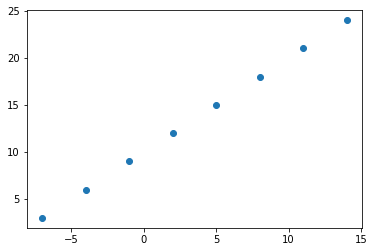

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])   # independent variable

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])   # dependent variable

# Visualize it
plt.scatter(X, y)  # very simple line scatterplot


In [7]:
# The relatio between X and y in the example is y = X + 10
y == X + 10    # --> this is the relationship or function that we want our NN to learn!

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

They vary depending on the problem you are working on.

In [8]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])

house_info, house_price   # sizes are then vector of 3 and scalar
# input shape is gonna be 3, and the output shape is gonna be 1

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [9]:
# In the previous example (scatterplot)
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
# Is this correct? Not really...as that is the collection of samples (8) 
# Our samples are composed of 1 input feature and 1 label
X[0], y[0]

(-7.0, 3.0)

In [11]:
X[1], y[1]  # we use X[1] to predict y[1]

(-4.0, 6.0)

In [12]:
# So then, the correct shape is...
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [13]:
# So the shape is () as we have special type of tensors, rank-0 tensors, scalars.
# So we have scalars as features and scalars as labels/targets.
X[0].ndim, y[0].ndim

(0, 0)

In [14]:
X[0], y[0] # we are going to build a model that is going to take as input negative seven and output 3, as in this training example

(-7.0, 3.0)

In [15]:
# In our model, we will use one X/input value to predict one y/output value.

In [16]:
# Turn out NumPy arrays into tensors (we might need to change the float value sometimes if some error)
X = tf.constant(X)  
y = tf.constant(y)
X, y

# we might need sometimes to change data type to avoid some warnings
# could be done like...
#X = tf.cast(tf.constant(X), dtype=tf.float32)
#y = tf.cast(tf.constant(y), dtype=tf.float32)
#X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape  # When there are no dimensions, means a scalar value, a single value (rank-0 or 0-dimensional tensor!)

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

#### A bit more of an in-depth guide to modelling with TensorFlow

1. Construct or import a pretrained model relevant to your problem
2. Compile the model (prepare it to be used with data)
  * Loss - how wrong your model's predictions are compared to the truth labels (you want to minimize this).
  * Optimizer - how your model should update its internal patterns to better its predictions.
  * Metrics - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns.
  * Epochs - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# In Keras you can create models using the Sequential or the Functional API
# Using the Sequential you can do it adding the stack of layers as a list....
model = tf.keras.Sequential([    # it says, create model that sequentially goes through the following layers
    tf.keras.layers.Dense(1)   # we predict a number with another number, so that is it
])

# Or it could also be defined as...(adding to the object Sequential object with the add method)
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #MAE is short for mean absolute error; comparisons of predicted vs. observed output. It says, on average, how wrong are our predictions?
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic Gradient Descent, tells the network how it should improve!
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)  # It says look to X and y and try to figure out the patterns by going 5 times through the whole training set (set of examples)
# An epoch is a the usage of the whole training set once. So this is looking or using the whole training set 5 times, going over through it five times to try to find the patterns, relationship between X and y.

Epoch 1/5
1/1 [==============================] - 1s 746ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


In [19]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])  # should be 27!
y_pred

array([[12.716021]], dtype=float32)

In [21]:
y_pred + 11 # how much on average is off according to mae metric, still far off!
# It fails, as it indicated by the loss and performance metric. How our model is wrong on average.
# So our trained model did not find the correct patterns between X and y. So let's improve it!

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model. Briefly...

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, and we might change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the *learning rate* of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (let it look at the training data more times, leave it training for longer) or on more data (give the model more examples to learn from).

In [22]:
# IMPROVING THE PREVIOUS MODEL PERFORMANCE

# Improve one, increasing the number of epochs

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([    
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)  # just increasing the epochs, the loss and mae went down almost half!

Epoch 1/100
1/1 [==============================] - 0s 316ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0

In [23]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Let's see if our model's prediction has improved...
model.predict([17.0]) # much better prediction just tweaking one hyperparameter of our smaller model!

array([[30.158512]], dtype=float32)

In [25]:
# IMPROVING THE PREVIOUS MODEL PERFORMANCE

# Tweaking another hyperparameter, changing the optimizer and the learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([    
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # larger the learning rate, larger the steps the optimizer tells the NN to improve the learnin!
              metrics=["mae"])                                          # smaller steps, correspond to lower learning rate                  

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)  

Epoch 1/100
1/1 [==============================] - 0s 375ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0548 - mae: 11.0548
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6048 - mae: 10.6048
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1548 - mae: 10.1548
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 9.7048 - mae: 9.7048
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2548 - mae: 9.2548
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8048 - mae: 8.8048
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3548 - mae: 8.3548
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.9048 - mae: 7.9048
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4548 - mae: 7.4548
Epoch 11/100
1/1 [==============================] - 0s 6ms/step 

In [26]:
# However, it is not always the case that changing any one of the parameters might result in an improvement!

# Usually make the smallest change possible. You do not necessarily always have to make big changes (e.g., adding 3 layers), you can just adjust one thing on your model, try it out and see how it goes!
# Better do many, many small changes than big changes! So you can actually track what caused the improvement.

# For example, next example is just adding another layer, keeping epochs at 100 and SGD optimizer

In [27]:
# IMPROVING THE PREVIOUS MODEL PERFORMANCE

# Tweaking another hyperparameter, adding a hidden layer, making it a larger model from a small model...

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API, this time with an extra hidden layer with a 100 hidden units
model = tf.keras.Sequential([  
    tf.keras.layers.Dense(100, activation="relu"),  
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=["mae"],  # the same as tf.keras.losses.mae
              optimizer="sgd",  # the same as tf.keras.optimizers.SGD()
              metrics=["mae"])  # metrics has to be always in a list                                                    

# 3. Fit the model (keeping 100 epochs as previous change, it improved!)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)  

Epoch 1/100
1/1 [==============================] - 0s 459ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 8ms/st

In [28]:
# Now mae, mean absolute error is about on average how wrong are our model's predictions, is almost half as before!
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [29]:
model.predict([17.0])

array([[31.38265]], dtype=float32)

In [30]:
# Seems model with just tweaking the epochs was better!! It was closer to the actual value.

# However, even though the model seems to be better, the test accuracy is worse than before. 
# So, the model seems to be overfitting, that is, is learning the training data too well. 
# So it is learning the patterns between X and y far too well. 
# So when it sees a new X, it is just relating back to what it knows and the error that is producing during training is not a really valid representation of what it is actually doing.
# The real way we do to evaluate ML models is not using the metrics that it gives from the training data but with the metrics we get from data it has never seen before (testing set data).

In [31]:
# So not all ways possible to improve a model lead to an actual improvement.
# And also sometimes the metrics seen during training are not necessarily representative of the metrics obtained in data that the model has never seen before. The testing data, using data the model has never seen before, is the real evaluation/generalization power of the model.

### Common ways to improve a deep model:

* **Adding layers** (makes the model larger, more complex)
* **Increase the number of hidden units** (makes the model larger, more complex)
* **Change the activation functions**
* **Change the optimization function** (tells the model how to improve)
* **Change the learning rate** (tells the model how much to improve per step). *Potentially the most important hyperparameter you can change on all neural networks* 
* **Fitting on more data** (using a larger training set)
* **Fitting for longer** (train for more epochs)

There are called hyperparameters because we can alter them. They are like a dial on your neural network that you can adjust to see how it improves, whereas a parameter is usually the patterns (weights) a neural network learns, so we do not code them ourselves.

In the previous example, adjusting the learning_rate parameter of the optimizar has resulted in the best improvement!


## Evaluating a model

As important as fitting a model to data is evaluating a model's performance. 

How do we tell exactly how good our model's predictions are or how good the pattern/relationships it has learned between X and y?

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
````



When you are building models you have to: experiment, experiment, experiment.

While when it comes to evaluation...there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It is a good idea to visualize: 

* **The data** - what data are we working with? What does it look like?
* **The model itself** - what does our model look like?
* **The training of the model** - how does a model perform while it learns?
* **The predictions of the model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [32]:
# Let's try these concepts on a larger problem...

# Make a bigger data set

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [33]:
# Make labels for the data set

y = X + 10   # this is the function we want the model to learn
y  # we have one y value for every X value

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

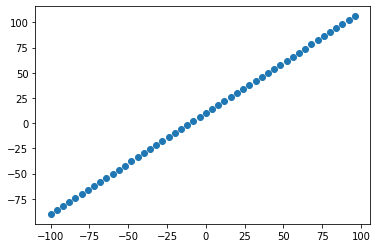

In [34]:
# 1. Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 data sets...(possibly the most important concept in ML)

In ML you are not going to fit and evaluate on the same data set. In this regard, when you are working in ML problems you will often going to have three different sets of data:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available. (e.g., course materials of a course)
* **Validation set** - the model gets tuned on this data, so you would tweak different things and test the performance of the model in this data after these changes. This is typically 10-15% of the data available. (e.g., practice exam of a course)
* **Test set** - the model gets evaluated on this data to test what it has learned. This set typically 10-15% of the total data available. (e.g., final exam of a course).

Depending on how much data you have, sometimes you get rid of the validation set and just split into training and test set.

The underlying goal here is **GENERALIZATION**, the ideal state that we want to achieve with the model, which regards to the ability of a ML model to perform well on data it has not seen before (not included in the training/dev set).


In [35]:
# Check the length of how many samples we have
len(X)

50

In [36]:
# That's pretty small data set so we are going to skip the validation set for now
# Let's create a 80-20 training-testing sets, so split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)   # training and testing features, training and testing labels

(40, 10, 40, 10)

In [37]:
# Let's continue with visualizations for evaluation!

### Visualizing the data

Now we've got our data in training and testing sets...let's visualize it again!

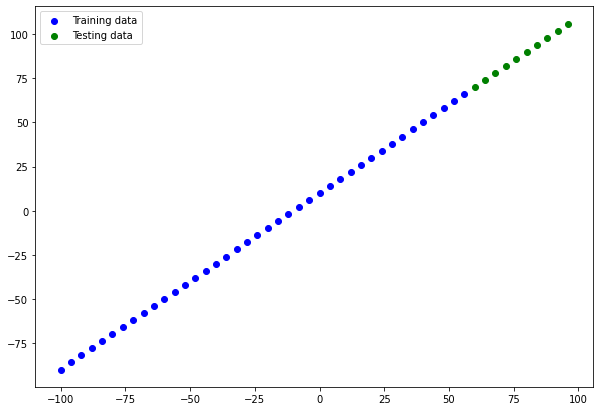

In [38]:
plt.figure(figsize=(10, 7))   # figure size

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")  # our model will learn on this

#plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")  # want our model to be able to predict this (given X, what's y?)

#show a legend
plt.legend();   # semicolon is to not get a live output

In [39]:
# Any time you can visualize your data, your model, your anything, it is a good idea to do it!
# So that way is much easier to understand!

In [40]:
# So now we are going to build a neural network to take in the training data to learn the relationship between X and y, and then we want the model to learn the relationship in the training data so it can predict our testing data.
# So if we feed the X values of our test data, we want the model to be able to predict the y values.

In [41]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model 
model = tf.keras.Sequential([  
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])                                                  

# 3. Fit the model 
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)  # now we feed just X_train, y_train

### Visualizing the model

In [42]:
#model.summary()  # will get an error if model not fit, use instead model.build() with input_shape argument
# or provide an input_shape parameter to the first layer in the code above, let's do it this way!

In [43]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [44]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([  # sequential model runs from top to bottom
    tf.keras.layers.Dense(1, input_shape=[1])  # input shape is one number/scalar, to predict 1 number/scalar
])


# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,  
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])                                                  


In [45]:
model.summary()  # now as input_shape is set, even if the model is not fit, it plots the model summary!

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Calling model.summary() shows us the layers that it contains, the output shape and the number of parameters of each layer.
# Dense is another word for fully connected layer.
# Fully connected means that all neurons on one layer are connected to all neurons on the previous and next layer.
# "Densely connected" layer.

Summary Output:

* **Total params** - total number of parameters in the model (these are the patterns that the model is going to learn, the number of patterns it is going to try to learn in the relationship between X and y).
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during *transfer learning*). 

**Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video (https://introtodeeplearning.com). 

**Exercise**: Try playing around with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`.

In [47]:
# The actual parameters in a dense layer you will probably find something called WEIGHTS MATRIX and BIAS VECTOR.
# These are the trainable/learnable parameters (patterns) in a NN.

In [48]:
# Let's fit our model to the training data (step 3 before)

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose does not show anything during training

In [49]:
# As we are running this continually, every time we run the cell of fit again (step 3), it actually fits the model for an extra hundred epochs.
# To reset that, you have to reinstantiate the model (steps 1 and 2)

In [50]:
# Get a summary of our model and play with the number of hidden units to see how it affects the number of parameters
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 1. Create a model (same as above)
model = tf.keras.Sequential([  # sequential model runs from top to bottom
    tf.keras.layers.Dense(10, input_shape=[1])  # input shape is one number/scalar, to predict 1 number/scalar
])


# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,  
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])    

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Seems to be 2 trainable parameters per hidden unit (i.e., a weight and a bias per unit)

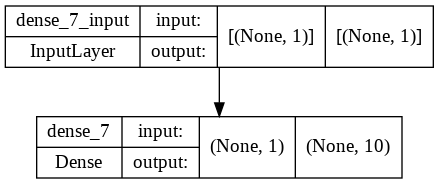

In [53]:
# Another way to visualize the model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)  # dot format image of the model
# show_shapes = True as this is going to take a lot of time making sure our input/output shapes are correct

In [54]:
# Changing a bit the model to see the plot

# 1. Create a model (same as above)
model = tf.keras.Sequential([  # sequential model runs from top to bottom
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_Layer"),
    tf.keras.layers.Dense(1, name="Output_Layer")
], name = "Model_1")


# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,  
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])    

model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


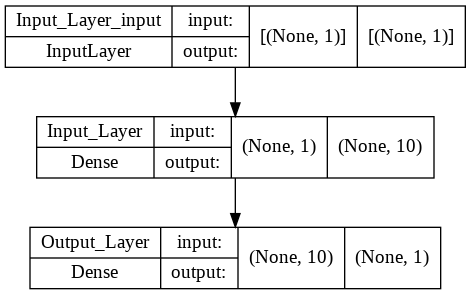

In [55]:
# with the parameter name set, now everything has a specific name!
# it is very helpful when you have many layers, to know which is which

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [56]:
# Train the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose does not show anything during training

In [57]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred  # we get a tensor in the same format as y_test

array([[ 75.978065],
       [ 80.92622 ],
       [ 85.87439 ],
       [ 90.82255 ],
       [ 95.77071 ],
       [100.718864],
       [105.66703 ],
       [110.61519 ],
       [115.563354],
       [120.51152 ]], dtype=float32)

In [58]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [59]:
# In an ideal world, they would be the exact same numbers. If the model learned the data perfectly and could predict the test data set 100% correctly.

**Note**: If you feel like you're going to reuse some kind of functionality in the future, it is a good idea to turn it into a function.

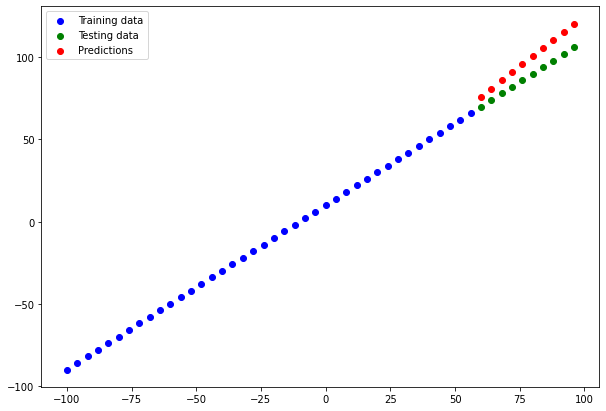

In [60]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,   # all have default values
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend();

plot_predictions()

In [61]:
# This graph shows quite well the performance in a fast and compelling way!
# The predictions do not seem bad, however depending on the scale, the distance between the predictions and the test data might be fairly large, indicating a large error.
# So, the best way to figure this out is with some evaluation metrics!

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance. 

Since we're working on a regression problem, two of the main metrics, plus an extra one:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions". Use: great starter metric for any regression problem.
* **MSE** - mean square error, "square the average errors". Use: when larger error are more significant than smaller errors (as the square amplifies the impact of larger errors on the value).
* **Huber loss** - combination of MSE and MAE. Use: it is less sensitive to outliers than MSE.

In [62]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 243ms/step - loss: 10.2448 - mae: 10.2448


[10.244787216186523, 10.244787216186523]

In [63]:
# In this case loss and evaluation metric is the same as we used the same metric for both things.

# What if you want to compute another performance metric on their own? By not calling the evaluation method...

In [64]:
# Calculate the Mean Absolute Error to compare y_pred to y_test, without using evaluate method!
mae_loss = tf.metrics.mean_absolute_error(y_true = y_test, 
                                          y_pred = y_pred)
mae_loss, tf.reduce_mean(mae_loss)   # individual loss for each sample, and the mae (average)
# but also it actually does it well if both tensors are of the same shape, originally they are not

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([13.613161 , 11.22951  , 10.025122 , 10.16451  , 11.5082855,
        14.031319 , 17.733624 , 22.615189 , 27.563354 , 32.51152  ],
       dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=17.09956>)

In [65]:
y_pred, y_test # they have a different shape

(array([[ 75.978065],
        [ 80.92622 ],
        [ 85.87439 ],
        [ 90.82255 ],
        [ 95.77071 ],
        [100.718864],
        [105.66703 ],
        [110.61519 ],
        [115.563354],
        [120.51152 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [66]:
tf.squeeze(y_pred) # to get rid of the additional empty/single dimension

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.978065,  80.92622 ,  85.87439 ,  90.82255 ,  95.77071 ,
       100.718864, 105.66703 , 110.61519 , 115.563354, 120.51152 ],
      dtype=float32)>

In [67]:
mae_loss = tf.metrics.mean_absolute_error(y_true = y_test, 
                                          y_pred = tf.squeeze(y_pred))
mae_loss  # now it computes the average well! when the shapes match! Now both y_test and y_pred are shape = (10,)

<tf.Tensor: shape=(), dtype=float32, numpy=10.24479>

In [68]:
# Calculate the Mean Squared Error
mse_loss = tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
mse_loss

<tf.Tensor: shape=(), dtype=float32, numpy=112.37256>

In [69]:
# Good!!! MSE will be typically higher than MAE, as MSE squares the errors, which are typically larger!
# Use MSE when larger errors matter more than small errors!!

In [70]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = y_pred)
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred = y_pred)

### Running experiments to improve our model (minimize the difference between our model predictions and the test labels)

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...

Ways to improve our model:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2.  **Make your model larger** (using a **more complex** model) - this might come in the form of more layers, or more hidden units in each layer.
3. **Train for longer** - give your longer more of a chance to find patterns in the data.

Let's do three modeling experiments (we will not use more data, so we will test the other two options):

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

*Mindset*: start with a baseline model, and then run modeling miniexperiments tweaking one of the parameters for the next experiment. And then do the same for the next experiment, and so on.

##### Machine learning explorer's motto -> "Visualize, visualize, visualize".
##### That is, taking a look to everything: data, model, training and predictions. As much as possible and as often as possible!


##### Machine learning practitioner's motto -> "Experiment, experiment, experiment"

##### That is, run a series of experiments to see if we can improve the model following the workflow above (build a model, fit it, evaluate it, tweak it...)

In [71]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [72]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

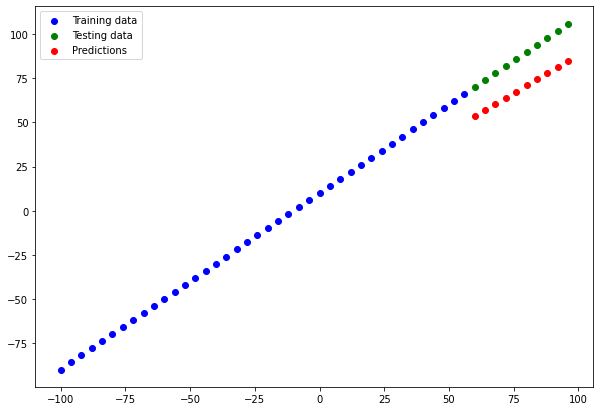

In [73]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)   # the test has to be on data that the model has never seen before!
plot_predictions(predictions = y_preds_1)   # the other paramaters are hardcoded (default values)

In [74]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1)) #squeeze works in this case so they have the same shape!! We get rid of the single dimension there and have both (10,)
mse_1 = mse(y_test, tf.squeeze(y_preds_1)) 
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [75]:
# So on average, each dot is 18.74 away from where it should be!
# When we square the errors, then there is less easy interpretation about it! Larger error value!

**Built `model_2`**

In [76]:
# 2 dense (or fully connected) layers, trained for 100 epochs

# Set the random seed
tf.random.set_seed(42)

#1. Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),   # number of units is kind of arbitrary, we will try this experiment with 10, but could be a different value
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])  # we will try a different one, but as long as we do not change the loss, it is the same

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [=======================

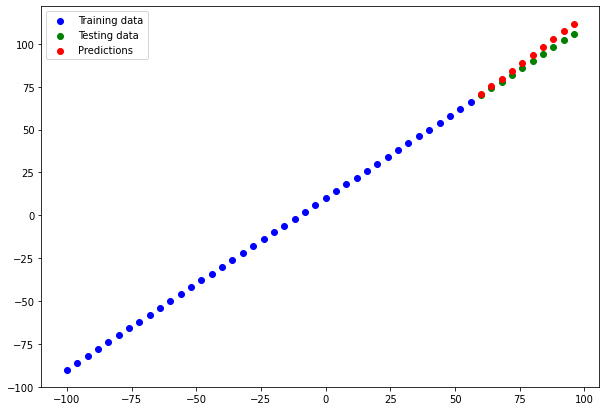

In [77]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)  
plot_predictions(predictions = y_preds_2) 

In [78]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2)) 
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**

In [79]:
# Train for longer, 500 epochs, with 2 layers.

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)   #this is the output layer!
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 42.5822 - mse: 2823.1755
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 10.9331 - mse: 167.2227
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 26.9259 - mse: 1062.6483
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 13.6703 - mse: 247.0116
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 15.1926 - mse: 292.5402
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 12.0801 - mse: 177.9818
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.4040 - mse: 158.0894
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1956 - mse: 171.4060
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 41.6513 - mse: 2760.7690
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.8935 - mse: 1179.5691
Epoch 11/500
2/2 [==========================

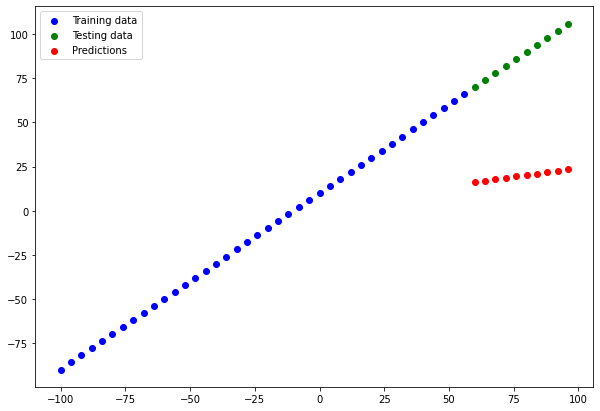

In [80]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)  
plot_predictions(predictions = y_preds_3) 

In [81]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3)) 
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.149315>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4729.35>)

In [82]:
# This last is an example of how tweaking some hyperparameters you think might lead to a better result, do not lead to a better result!
# This is model OVERFITTING!
# Essentially means that the model has learned the training data too well and it does not generalize well to data it has not seen before!

**Important note**: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary. (Start small, build up, add complexity when needed). 

Start small, build up, add complexity when needed.

### Comparing the results of our experiments

Machine learning practictioner's motto -> "Experiment, experiment, experiment". But comparing to see what works and what does not!

We've run a few experiments, let's compare the results. 

Basically, compare the experiments. Discard what does not work, continue with the ones that work and keep experimenting.

In [83]:
# Compare the experiment results in a structured way
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results  # worrks but is harrd to read

,Model,MAE,MSE
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(353.57336, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(3.1969407, shape=(), dtype=float32)","tf.Tensor(13.070143, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(68.149315, shape=(), dtype=float32)","tf.Tensor(4729.35, shape=(), dtype=float32)"


In [84]:
model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results  # worrks but is harrd to read

,Model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.149315,4729.350098


Looks like `model_2` performed the best...

In [85]:
# Model 2 performed the best
model_2.summary()   # 2 layers, fit for 100 epochs

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments, that is why is important to start small! The more experiments you do, the more things you'll figure out which do not work and in turn, then when you know what does not work, you will get closer to figuring out what does work. Remember the ML practictioner's mott: "experiment, experiment, experiment".

In [86]:
# Comparing differrent models is what machine learning modelling is all about.
# Trying many different combinations of models and seeing which one performs best and what does not
# Each experiment is to figure out what doesnt work and what works

### Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you will want to look into using:

* **TensorBoard** - a component of the TensorFlow library to help track modeling experiments (we will see this one later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard). https://wandb.com 

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

Theree are two main formats we can save our model's to: 

1. The SavedModel format. (default one in TF)
2. The HDF5 format.

They both can be saved using the same function in TF. Which saves:

    * Model architecturre, allowing to re-instantiate the model.
    * Model weights.
    * State of the optimizer, allowing to resume training exactly where you left off.

In [87]:
# Save model using the SaveModel format (TF related and creates multiple files; inside a folder)
model_2.save("best_model_SavedModel_format")  # good format if TF will be used consistently for the model

In [88]:
# Save model using the HDF5 format (HDF5 standard, universal data format and a single file)
# Adding .H5 saves the model in HDF5 format.
model_2.save("best_model_HDF5_fomat.h5")  # better format if the model is going to be used outside of TF

In [89]:
# Check if the model has been saved correctly -> Loading it! And reevaluate it!

## Loading in a saved model

In [90]:
# Restore models using both formats

# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")

loaded_SavedModel_format.summary()  # same as model 2 above!

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Model is the same, what about the weights (patterns the model has learned)?
# Let's make some predictions and compare!

# Compare model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format(X_test)

model_2_preds == loaded_SavedModel_format_preds

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [93]:
# extra check, compare the mae of model_2_preds and loaded_SavedModel_preds
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [94]:
# The same!!!!!!
# model_2_preds.squeeze(), loaded_SavedModel_format_preds.squeeze()

In [95]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_fomat.h5')

loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [96]:
# model looks the same...
# check to see if loaded .h5 model predictions match model_2

model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model(X_test)

model_2_preds == loaded_h5_model_preds   # always check if the model is well imported, does same predictions! It could be done using a function coded for it!!

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you are after (or the three dots) and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [97]:
# Download a file from Google Colab
from google.colab import files

files.download("/content/best_model_HDF5_fomat.h5")  # it downloads it!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive), using the copy command
!cp /content/best_model_HDF5_fomat.h5 /content/drive/MyDrive/<folder_here>  # copying it to the mounted drive

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `cp /content/best_model_HDF5_fomat.h5 /content/drive/MyDrive/<folder_here>  # copying it to the mounted drive'


In [99]:
!ls /content/drive/MyDrive/<folder_here> # should show the file there

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `ls /content/drive/MyDrive/<folder_here> # should show the file there'


## A larger example

Using more complex data :)

In [100]:
# We are going to use Medical Cost Personal Datasets from Kaggle
# Kaggle has very good example datasets!! 

# DATASET LINK --> https://www.kaggle.com/datasets/mirichoi0218/insurance

# Goal is to use the features (age, sex, bmi, etc.) to predict someone's individual costs build by a health insurance.
# So it is a regression problem, we use the features to forecast a number!

# Getting the data from GitHub repository and raw data link -> https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv


In [101]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
# the function will get it and import it directly using the url

insurance # shape is 1338 rows and 6 features, and the target variable which is charges


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [103]:
# Goal, learn the relationships between the features and the target variable, charges.
# Regression problem!! Relation between the dependent variable (outcome variable, target) and the independent variables (features, predictors, covariates)

In [104]:
# FIRST STEP is to make everything numeric datatype! (convert strings, binary, etc.)
insurance["sex"], insurance["age"], insurance["region"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64, 0       southwest
 1       southeast
 2       southeast
 3       northwest
 4       northwest
           ...    
 1333    northwest
 1334    northeast
 1335    southeast
 1336    southwest
 1337    northwest
 Name: region, Length: 1338, dtype: object)

In [105]:
# We have to change everything non-numeric to numeric before we can pass it to a deep neural network or a ML model. 
# How?
# Creating the NUMERICAL ENCODING before passing the values to the DL model

In [106]:
# Let's use ONE HOT encoding, one of the simplest methods to turn categorical values into numerical variables
# We could do it manually, creating the dummy variables ourselves, but we are going to use pandas get_dummies function!

# get_dummies from Pandas allows the creation of ONE HOT encoding for categorical variables

# One hot encoding creates dummy/indicator variables to encode the categorical data!!

In [107]:
# Let's try one-hot encode our DataFrame so it is all numbers!
pd.get_dummies(insurance)  # it creates all the dummy variables automatically for the categorical variables to numeric encoding!!!!!!!

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [108]:
# Saving it into a variable
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()  # check the first rows

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [109]:
# NEXT STEPS
# 1. Create X & y values (features and labels)
# 2. Create training and test sets
# 3. Build a neural network (sort of like model_2 above)

In [110]:
# 1. Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)  #getting the features, dropping the target
y = insurance_one_hot["charges"]  # getting the target column alone

In [111]:
# View X
X.head()   # always visualize, visualize, visualize when in doubt!

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [112]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [113]:
# Create training and test sets using a much better function that randomizes the selection, using scikit-learrn train/test split function
# Creating these sets is one of the most important things in ML
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #80-20 split is very common
# random_state for reproducibility to get the same split every time, otherwise would change
len(X), len(X_train), len(X_test)   # randomly shuffled split, 80% training, 20% testing

(1338, 1070, 268)

In [114]:
X_train, X_test, y_train, y_test

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [115]:
# 3. Build a neural network (sort of like model_2 above) to take in X_train and y_train and learn the relationships between the two.

tf.random.set_seed(42)

# 1. Create a model 
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [116]:
# We did not even need to reformat the inputs/targets into tensors
# That is because Pandas is built on top of numpy! So it is actually using numpy arrays in the back.
# So TF knows how to handle numpy arrays and, consequently, pandas!

In [117]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [118]:
# So the performance on the testing set is slightly better than in the training set, cool!!

# Remember than MAE means that, on average, our model is wrong about 7000 per prediction!
# So it is that large, it is significant compared to the other values in our dataset?

y_train.median(), y_train.mean()  # with these averages, making an error of 7000 off on average is quite a lot!!

(9575.4421, 13346.089736364485)

Right now it looks like our model is not performing too well...let's try and improve it!

To (try) improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer the model above
3. (insert your own experiment here)

In [119]:
# Set random seed
tf.random.set_seed(42)

# 1.  Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),   # extra layer added, more potential to learn in theory, more complex model
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])
#
# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan           
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 

In [120]:
# What happens? Why the loss and mae are nan?
# Let's troubleshoot!

# The addition of the layer made the model too complex maybe four our dataset that is not so large enough to teach it anything
# Let's alter something about the compile step, changing the optimizer

In [121]:
# Set random seed
tf.random.set_seed(42)

# 1.  Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),   # extra layer added, more potential to learn in theory, more complex model
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),  #ADAM is a good one to go!!
                          metrics=["mae"])
#
# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [122]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [123]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [124]:
# The new model provided an improvement of 30%, the error went down significantly!
# We did two changes:
# Added an extra layer
# Chaned the optimizer (as SGD was not learning)

# So Experiment 1 was modified to adding an extra layer and use the Adam optimizer (after trying to solve the issue)

In [125]:
# Now training for longer, epochs = 200

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)



Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [126]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [127]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [128]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [129]:
# So insurance_model_3 is the best model so far!!
# We could try more things but let's see the history variable that we just stored now...

Text(0.5, 0, 'Epochs')

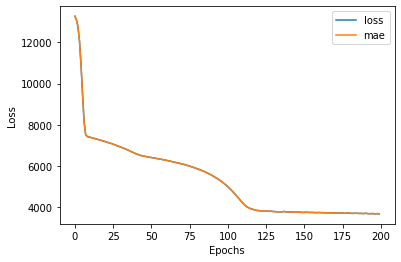

In [130]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()   # history attribute of history has the values!
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [131]:
# TADAAAAA!! That's a LOSS CURVE / TRAINING CURVE, and beautifully decreasing!!
# The loss decreases as the network starts to learn (the loss function in this case is MAE)
# This learning is what this curve is reflecting

So when we are training neural networks generally we want our loss curve to go down because that means that the predictions our model is making are becoming less and less wrong. 

In [132]:
# From the prvious curve it looks that the loss would keep decreasing, maybe not as much as initially though if you train for longer.

Base on that, **Question:** How log should you train for?

It depends. Really...it depends on the problem you are working on. However, many people have asked this question before...so, TensorFlow has a solution! It is called the [**EarlyStopping callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

The **EarlyStopping** callback is a TF component you can add to your model to stop training once it stops improving a certain metric. So let's say you put the training for X amount of epochs; if the loss stops decreasing for a certain amount of epochs in a row, that means the model stopped improving, then stop training. 

## Preprocessing data (normalization and standardization)

Getting the data ready is probably the most important step in all the modeling pipeline. It consists of:

1. Turn all data into numbers (neural networks can't handle strings, like most ML models)
2. Make sure all of your tensors are the right shape (othewise we would have issues)
3. **Scale features** (normalize or standardize, neural networks tend to prefe normalization).

We are going to deal with the third step now!

In [133]:
# Let's look at the data

X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


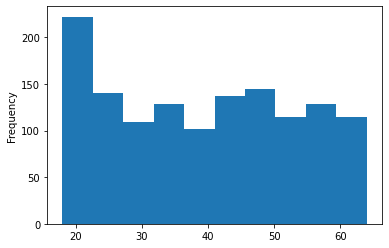

In [134]:
# We see for instance how age is in a different scale to BMI, as shown by the plots
X['age'].plot(kind="hist")   # distribution of age column

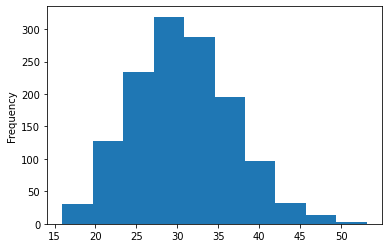

In [135]:
X["bmi"].plot(kind="hist")   # distribution of bmi

In [136]:
# So what if we want to have both of them in a similar scale?
# The same is applicable to children that ranges in a much more narrow range!
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [137]:
# So if we want to get all of them between 0 and 1, in the same scale?
# That is what NORMALIZATION does.

### Feature scaling

* **Scale** (also referred to as **normalization**) -> converts all values to between 0 and 1 whilst preserving the original distribution.
    * Scikit-learn function: `MinMaxScaler`
    * Use: as default scaler with neural networks.

* **Standardization** -> removes the mean and divides each value by the standad deviation. 
    * Scikit-lean function: `StandardScaler`
    * Use: transform a feature to have close to *normal distribution* also known as *Gaussian* (caution: this reduces the effect of outliers)

In terms of scaling values, neural networks tend to prefer normalization. 

If you are not sure on which to use, you could try both and see which performs better.

Read this amazing article about it: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [138]:
# We are going to start fresh so we can run the notebook from this point...

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe, so we reinstantiate it here and see what the process of normalization does
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [144]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer, because our features are in the columns!
ct = make_column_transformer(   # very interesting to transforrm some columns in a specific way!!
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all these values in this columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # ignore the values it does not how to handle
    )


# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)   # exact split as before

# Fit the column transformer to our training data (only)
# ALWAYS FIT AND TRANSFORM THE TRANSFORMER ON THE TRAINING DATA and TRANSFORM (NOT FIT) THE TESTING DATA
# AS TEST DATA IS UNKNOWN DATA FOR THE MODEL, FUTURE DATA; SO IF WE FIT WITH DATA FROM THE FUTURE IS TAKING KNOWLDEGE WE SHOULD NOT KNOW AND GET ADVANTAGE OF IT

ct.fit(X_train)   # fit the tranformer to the train data only; we learn from the training and apply it later

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)    # transform both test and train data! Normalizing and one hot encoding!
X_test_normal = ct.transform(X_test)

In [148]:
# What does our data look like now?
X_train.loc[0]    #original data

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [147]:
X_train_normal[0]  #transformed data for the same row in the data set as above

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [150]:
X_train_normal  # everything has been correctly transformed

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [153]:
# How does the shape changes? Additional features are created...(dummy features)...
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes!

In [154]:
# Build a neural network model to fit on our normalized model
# Same as before but now with the features normalized!

tf.random.set_seed(42)  # for reproducibility

# 1. Create a model, reproduce the insurance_model_2 before
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)   # before data was not normalized!

# In every experiment we change a small thing at a time, the rest remains the same! In this case we change the data we are using!
# Small changes so we can see how that influences the model (keeping the rest constant)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [156]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)  

# Always evaluate in the same type of data it was trained. If its normalized, then normalized; if its not, then not.

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [158]:
# Awesome! Model 2 had a loss of 4924 on the test set!! Much better now just normalizing the data!!
# Just normalizing the data, there was a reduction of 30% or so!!! Awesome!!!

# NOT ONLY WE CAN CHANGE MODEL HYPERPARAMETERS; COMPILATION; TRAINING...ALSO THE DATA ITSELF!!

In [159]:
# MENTALITY, ALWAYS EXPERIMENT! THERE ARE SO MANY THINGS YOU CAN TWEAK, OFTEN THE FIRST RESULTS YOU GET ARE REALLY IMPROVABLE!!

One of the benefits of normalization is a faster convergence time (usually). That means our model gets to a better result faster, in less epochs!

### END OF REGRESSION TOPIC!!!